# Predicting Heart Disease Using Clinical Data

# Introduction

Cardiovascular diseases (CVDs), commonly referred to as heart diseases, are the leading cause of death worldwide, claiming approximately 17.9 million lives annually, according to the World Health Organization. These diseases, often preventable through early intervention, disproportionately affect low- and middle-income countries due to limited healthcare access and untreated risk factors like high cholesterol, sedentary lifestyles, and smoking.

Early detection plays a critical role in managing heart disease by enabling timely interventions and reducing fatalities. In this project, machine learning models are used to predict heart disease based on clinical and demographic data. The goals are to:

- Analyze relationships between key features such as age, cholesterol levels, and exercise-induced angina.

- Compare the performance of multiple classification models in predicting heart disease.

- Identify significant predictors to aid healthcare providers in early diagnosis and personalized treatment.

This analysis demonstrates how data-driven approaches can support healthcare professionals in combating one of the most pressing global health challenges.

### Dataset Description

#### Source:
The dataset used in this project is sourced from Kaggle the UCI Machine Learning Repository. It is widely used for research in heart disease prediction and contains clinical and demographic features.

#### Structure:
- **Number of Observations**: 303 rows
- **Number of Features**: 14 columns (13 features + 1 target variable)
- **Features**:
  - **Numerical**:
    - age: Patient's age in years
    - trestbps: Resting blood pressure (in mmHg) upon hospital admission
    - chol: Serum cholesterol (in mg/dL)
    - thalach: Maximum heart rate achieved during exercise
    - oldpeak: ST depression induced by exercise relative to rest
    - ca: Number of major vessels (0–3) colored by fluoroscopy
  - **Categorical**:
    - sex: Gender (1 = Male, 0 = Female)
    - cp: Chest pain type (0 = Typical Angina, 1 = Atypical Angina, 2 = Non-Anginal Pain, 3 = Asymptomatic)
    - fbs: Fasting blood sugar >120 mg/dL (1 = True, 0 = False)
    - restecg: Resting electrocardiographic results (0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy)
    - exang: Exercise-induced angina (1 = Yes, 0 = No)
    - slope: Slope of the peak exercise ST segment (0 = Upsloping, 1 = Flat, 2 = Downsloping)
    - thal: Thalassemia (1 = Normal, 2 = Fixed Defect, 3 = Reversible Defect)
  - **Target Variable**:
    - target: Diagnosis of heart disease (1 = Disease, 0 = No Disease)

#### Pre-Analysis Observations:
1. **Balanced Target Variable**: Initial inspection shows that the dataset is relatively balanced between the two classes (presence vs. absence of heart disease). This will be verified in the exploratory data analysis (EDA) section.
2. **Feature Encoding**: Categorical features have been pre-encoded with numerical values, which might require adjustments during preprocessing for better interpretability (e.g., using descriptive labels).
3. **Potential Data Issues**:
   - **Small Sample Size**: With 303 observations, the dataset size may limit the generalizability of models. This will be addressed during modeling through techniques like cross-validation.
   - **Missing Contextual Variables**: While the dataset covers essential clinical features, it does not include lifestyle factors (e.g., smoking, diet) or family history, which are often critical in heart disease prediction.

#### Relevance:
The dataset is highly applicable for exploring machine learning models in healthcare, as it focuses on widely available clinical and demographic features. These attributes are routinely measured in medical settings, making the findings potentially generalizable to real-world diagnostic processes.

#### Next Steps:
The dataset will be cleaned, and faulty data points will be removed before proceeding with EDA. Descriptive statistics and visualizations will be used to uncover patterns and relationships between features. Classification models will be developed and compared, with emphasis placed on recall to minimize missed diagnoses of heart disease. Feature importance analysis will also provide actionable insights for healthcare practitioners.


# 1. Exploratory Data Analysis

In [98]:
# @title
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [99]:
# @title
# Upload the CSV file
uploaded = files.upload()

Saving heart.csv to heart (2).csv


In [100]:
# @title
# Save and Load the dataset
for filename in uploaded.keys():
    print(f"Saved file: {filename}")
    heart_disease = pd.read_csv(filename)

Saved file: heart (2).csv


In [101]:
# @title
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# @title
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Note: From the data types we see that all features are int64/float64. But that is because some of the categorical features including the target (has disease/no disease) are already label encoded for us.

#  Data pre-processing

## Drop faulty data

Rows with invalid or inconsistent values, such as ca = 4 or thal = 0, are removed based on dataset documentation to ensure data quality and reliability in the analysis.

In [7]:
# @title
# Filter Faulty Data Based on Conditions
# Remove rows where ca=4 and thal=0 (faulty values based on documentation)
cleaned_data = heart_disease[(heart_disease['ca'] < 4) & (heart_disease['thal'] > 0)]

#  Reset the Index After Filtering
cleaned_data = cleaned_data.reset_index(drop=True)

# Verify the Cleaned Data
print(f'The length of the data now is {len(cleaned_data)} instead of {len(heart_disease)}!')
print("Updated Dataset Info After Cleaning:")
print(cleaned_data.info())


The length of the data now is 296 instead of 303!
Updated Dataset Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    int64  
 1   sex       296 non-null    int64  
 2   cp        296 non-null    int64  
 3   trestbps  296 non-null    int64  
 4   chol      296 non-null    int64  
 5   fbs       296 non-null    int64  
 6   restecg   296 non-null    int64  
 7   thalach   296 non-null    int64  
 8   exang     296 non-null    int64  
 9   oldpeak   296 non-null    float64
 10  slope     296 non-null    int64  
 11  ca        296 non-null    int64  
 12  thal      296 non-null    int64  
 13  target    296 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.5 KB
None


In [8]:
# @title
cleaned_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Renaming

Renaming Columns for Clarity

The dataset originally uses abbreviated column names (e.g., age, cp, thal) that may not be immediately understandable. Renaming them to more descriptive names improves readability and enhances clarity.

In [10]:
# @title
# Rename columns for clarity
column_rename_mapping = {
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'Chest Pain Type',
    'trestbps': 'Resting Blood Pressure',
    'chol': 'Cholesterol',
    'fbs': 'Fasting Blood Sugar',
    'restecg': 'Resting ECG Results',
    'thalach': 'Maximum Heart Rate',
    'exang': 'Exercise-Induced Angina',
    'oldpeak': 'ST Depression',
    'slope': 'Slope of ST',
    'ca': 'Major Vessels',
    'thal': 'Thalassemia',
}

# Rename columns in the dataset
cleaned_data.rename(columns=column_rename_mapping, inplace=True)




Replacing Encoded Values:

Many categorical features in the dataset are encoded numerically (e.g., Sex as 0 and 1, Chest Pain Type as 0–3). While these codes are useful for machine learning models, they are harder to interpret during analysis. Replacing these numerical values with descriptive labels improves interpretability, making visualizations and analysis more meaningful.

In [12]:
# @title
# Replace coded categories with descriptive labels (excluding target)
category_replacements = {
    'Sex': {0: 'Female', 1: 'Male'},
    'Chest Pain Type': {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-Anginal Pain', 3: 'Asymptomatic'},
    'Fasting Blood Sugar': {0: '≤ 120 mg/dL', 1: '> 120 mg/dL'},
    'Resting ECG Results': {0: 'Normal', 1: 'ST-T Abnormality', 2: 'Left Ventricular Hypertrophy'},
    'Exercise-Induced Angina': {0: 'No', 1: 'Yes'},
    'Slope of ST': {0: 'Upsloping', 1: 'Flat', 2: 'Downsloping'},
    'Thalassemia': {1: 'Normal', 2: 'Fixed Defect', 3: 'Reversible Defect'}
}

# Apply replacements for all columns except the target
for column, mapping in category_replacements.items():
    cleaned_data[column] = cleaned_data[column].replace(mapping)

In [13]:
# @title
# Verify Changes
print("Updated Dataset Columns:")
print(cleaned_data.columns)

Updated Dataset Columns:
Index(['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure',
       'Cholesterol', 'Fasting Blood Sugar', 'Resting ECG Results',
       'Maximum Heart Rate', 'Exercise-Induced Angina', 'ST Depression',
       'Slope of ST', 'Major Vessels', 'Thalassemia', 'target'],
      dtype='object')


In [10]:
# @title
cleaned_data.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG Results,Maximum Heart Rate,Exercise-Induced Angina,ST Depression,Slope of ST,Major Vessels,Thalassemia,target
0,63,Male,Asymptomatic,145,233,> 120 mg/dL,Normal,150,No,2.3,Upsloping,0,Normal,1
1,37,Male,Non-Anginal Pain,130,250,≤ 120 mg/dL,ST-T Abnormality,187,No,3.5,Upsloping,0,Fixed Defect,1
2,41,Female,Atypical Angina,130,204,≤ 120 mg/dL,Normal,172,No,1.4,Downsloping,0,Fixed Defect,1
3,56,Male,Atypical Angina,120,236,≤ 120 mg/dL,ST-T Abnormality,178,No,0.8,Downsloping,0,Fixed Defect,1
4,57,Female,Typical Angina,120,354,≤ 120 mg/dL,ST-T Abnormality,163,Yes,0.6,Downsloping,0,Fixed Defect,1


In [14]:
# @title
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      296 non-null    int64  
 1   Sex                      296 non-null    object 
 2   Chest Pain Type          296 non-null    object 
 3   Resting Blood Pressure   296 non-null    int64  
 4   Cholesterol              296 non-null    int64  
 5   Fasting Blood Sugar      296 non-null    object 
 6   Resting ECG Results      296 non-null    object 
 7   Maximum Heart Rate       296 non-null    int64  
 8   Exercise-Induced Angina  296 non-null    object 
 9   ST Depression            296 non-null    float64
 10  Slope of ST              296 non-null    object 
 11  Major Vessels            296 non-null    int64  
 12  Thalassemia              296 non-null    object 
 13  target                   296 non-null    int64  
dtypes: float64(1), int64(6), o

#  Exploring Features/Target

#### Descriptive Statistics

In [15]:
# @title
# Descriptive Analysis for Numerical Features
numerical_features = ['Age', 'Resting Blood Pressure', 'Cholesterol', 'Maximum Heart Rate', 'ST Depression', 'Major Vessels']

# Summary statistics for numerical features
numerical_summary = cleaned_data[numerical_features].describe()


In [70]:
# @title
numerical_summary

,Age,Resting Blood Pressure,Cholesterol,Maximum Heart Rate,ST Depression,Major Vessels
count,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,131.60473,247.155405,149.560811,1.059122,0.679054
std,9.059471,17.72662,51.977011,22.970792,1.166474,0.939726
min,29.000000,94.00000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.00000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.00000,242.500000,152.500000,0.800000,0.000000
75%,61.000000,140.00000,275.250000,166.000000,1.650000,1.000000
max,77.000000,200.00000,564.000000,202.000000,6.200000,3.000000


### Descriptive Statistics for Numerical Features

### **Key Observations**

1. **Age**:
   - The average age is **54.52 years**, with most individuals between **48 and 61 years**.
   - The youngest patient is **29**, and the oldest is **77**.

2. **Resting Blood Pressure**:
   - The average resting blood pressure is **131.60 mmHg**, ranging from **94 to 200 mmHg**.
   - Most values fall between **120 and 140 mmHg**.

3. **Cholesterol**:
   - Average cholesterol level is **247.16 mg/dL**, with a maximum of **564 mg/dL**.
   - High variability suggests potential outliers above **400 mg/dL**.

4. **Maximum Heart Rate**:
   - Patients have an average maximum heart rate of **149.56 bpm**, with a peak of **202 bpm**.
   - Most values are clustered between **133 and 166 bpm**.

5. **ST Depression**:
   - The average is **1.06**, with most patients having values around **0.8 or lower**.
   - The maximum value of **6.2** indicates a significant outlier.

6. **Major Vessels**:
   - The average number of major vessels colored by fluoroscopy is **0.68**, ranging from **0 to 3**.
   - Most patients have **0 or 1 major vessels**, suggesting fewer blocked vessels in general.



**Descriptive Analysis for Categorical Features**

In [16]:
# @title
# Descriptive Analysis for Categorical Features
categorical_features = [
    'Sex', 'Chest Pain Type', 'Fasting Blood Sugar', 'Resting ECG Results',
    'Exercise-Induced Angina', 'Slope of ST', 'Thalassemia', 'target'
]

print("\nCounts for Categorical Features:")
for feature in categorical_features:
    print(f"\nFeature: {feature}")
    print(cleaned_data[feature].value_counts())


Counts for Categorical Features:

Feature: Sex
Sex
Male      201
Female     95
Name: count, dtype: int64

Feature: Chest Pain Type
Chest Pain Type
Typical Angina      141
Non-Anginal Pain     83
Atypical Angina      49
Asymptomatic         23
Name: count, dtype: int64

Feature: Fasting Blood Sugar
Fasting Blood Sugar
≤ 120 mg/dL    253
> 120 mg/dL     43
Name: count, dtype: int64

Feature: Resting ECG Results
Resting ECG Results
ST-T Abnormality                147
Normal                          145
Left Ventricular Hypertrophy      4
Name: count, dtype: int64

Feature: Exercise-Induced Angina
Exercise-Induced Angina
No     199
Yes     97
Name: count, dtype: int64

Feature: Slope of ST
Slope of ST
Downsloping    138
Flat           137
Upsloping       21
Name: count, dtype: int64

Feature: Thalassemia
Thalassemia
Fixed Defect         163
Reversible Defect    115
Normal                18
Name: count, dtype: int64

Feature: target
target
1    160
0    136
Name: count, dtype: int64


**Distribution of the Target Variable**

In [17]:
# @title
# Distribution of the Target Variable
print("\nDistribution of the Target Variable (target):")
print(cleaned_data['target'].value_counts(normalize=True))


Distribution of the Target Variable (target):
target
1    0.540541
0    0.459459
Name: proportion, dtype: float64


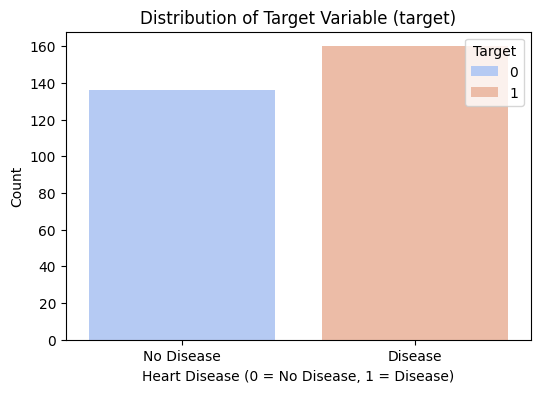

In [18]:
# @title
# Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=cleaned_data, hue='target', palette='coolwarm', dodge=False)
plt.title('Distribution of Target Variable (target)')
plt.xlabel('Heart Disease (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.legend(title='Target')
plt.show()

We observe that the target is fairly balanced with 46% with no heart disease and 54% with heart disease.

# Exploring Categorical Features

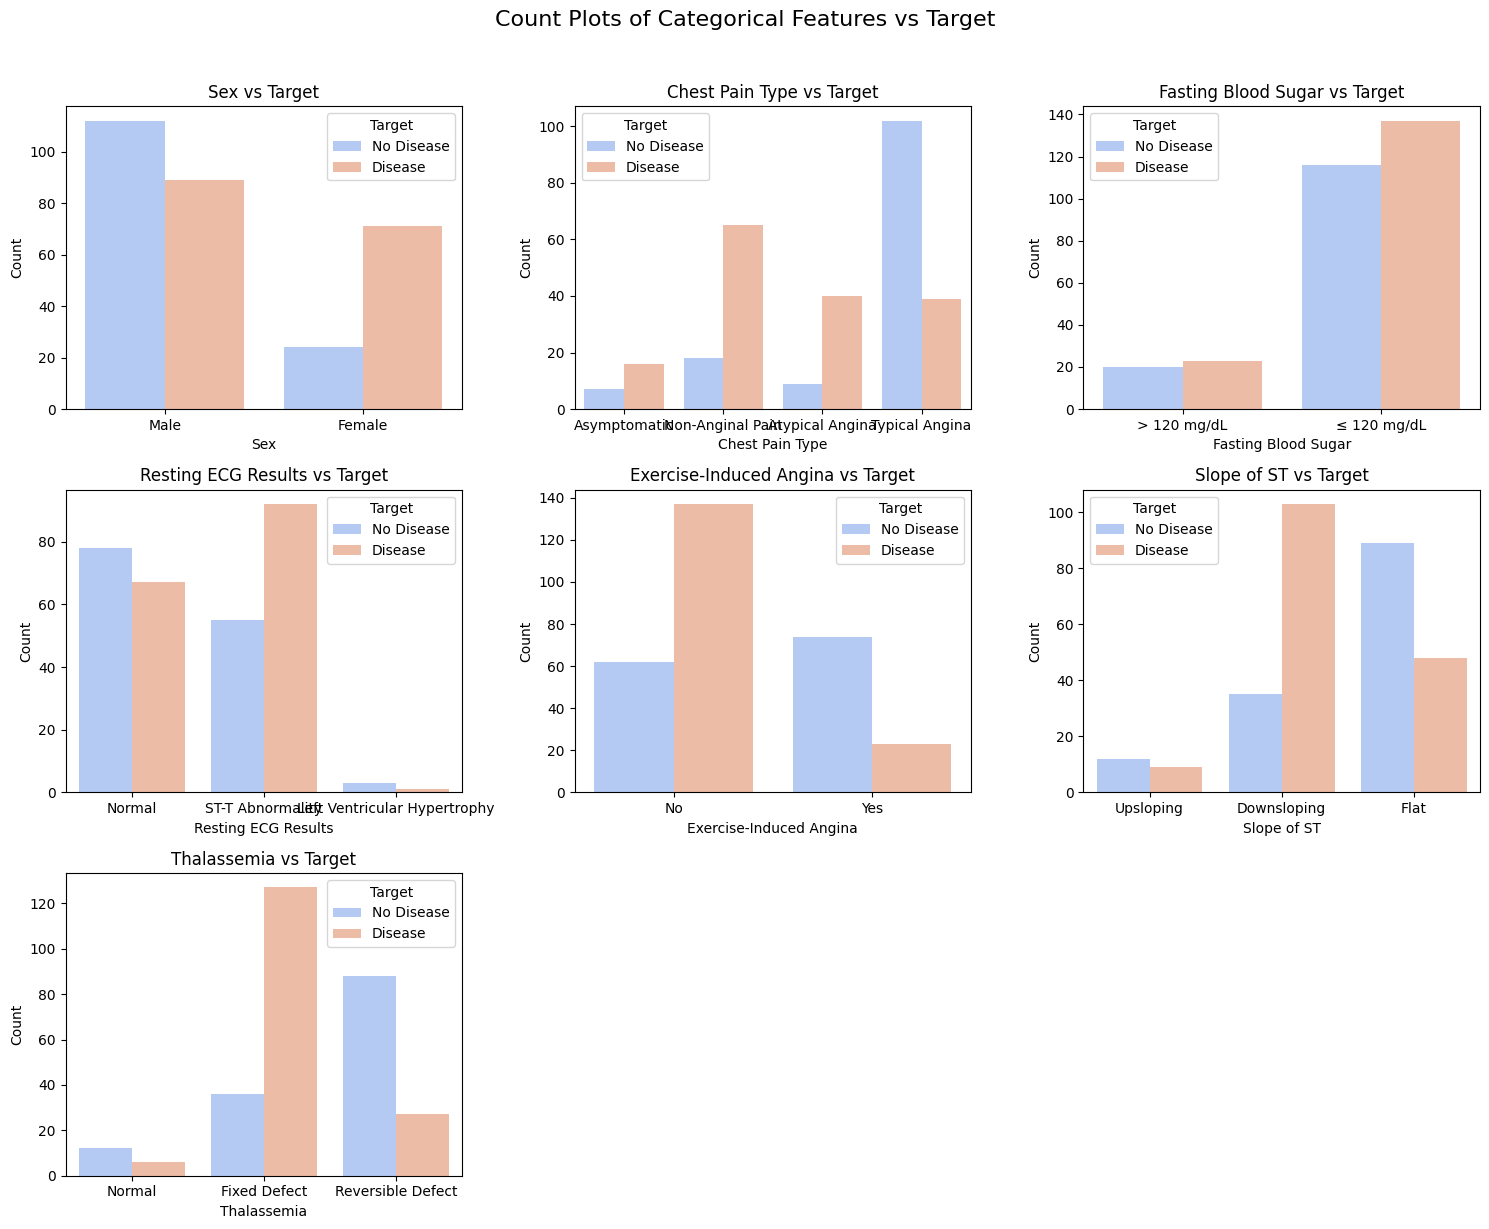

In [79]:
# @title
# Exploring Categorical Features
categorical_features = [
    'Sex', 'Chest Pain Type', 'Fasting Blood Sugar',
    'Resting ECG Results', 'Exercise-Induced Angina',
    'Slope of ST', 'Thalassemia'
]

plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, hue='target', data=cleaned_data, palette='coolwarm')
    plt.title(f'{feature} vs Target')
    plt.ylabel('Count')
    plt.xlabel(feature)
    plt.legend(title='Target', labels=['No Disease', 'Disease'])

# Add a title to the entire figure
plt.suptitle("Count Plots of Categorical Features vs Target", fontsize=16, y=1.02)

plt.tight_layout()
plt.show()


### **Key Observations Based on the Graphs**

#### **Sex:**
- More than two-thirds of the patients in the dataset are male.
- While males dominate both heart disease and no heart disease cases, females have a slightly higher relative proportion of heart disease.

#### **Chest Pain:**
- More than 75% of the patients experience either typical angina or non-angina chest pain.
- Patients who experienced atypical angina or non-angina chest pain are more likely to have a heart disease.

#### **Fasting Blood Sugar:**
- About **85% of the patients** have normal fasting blood sugar (≤ 120 mg/dL).
- Surprisingly, patients with normal fasting blood sugar are more likely to have heart disease, while those with higher fasting blood sugar (> 120 mg/dL) are less linked to heart disease.

#### **Resting Electrocardiogram:**
- Patients with **left ventricular hypertrophy** are the fewest (~1.4%).
- The dataset is nearly a 50-50 split between patients with **ST-T abnormality** and those with **normal ECG results**.
- **ST-T abnormality** is more strongly correlated with heart disease.

#### **Exercise-Induced Angina:**
- About two-thirds of the patients do not experience exercise-induced angina.
- ** patients with angina** are free of heart disease, while those without angina** are diagnosed with heart disease.

#### **ST-Slope:**
- Most patients have a **downsloping** or **flat ST slope**.
- **Downsloping slopes** are strongly associated with heart disease, while **flat slopes** show a more balanced distribution.

#### **Thalassemia:**
- Most patients have either a **fixed defect** or a **reversible defect**.
- Patients with **fixed defect thalassemia** are more likely to have heart disease, while those with **reversible defects** tend to be free of heart disease.
- The small group of patients with **normal thalassemia** shows a stronger association with no heart disease.





# Exploring Continuous Features

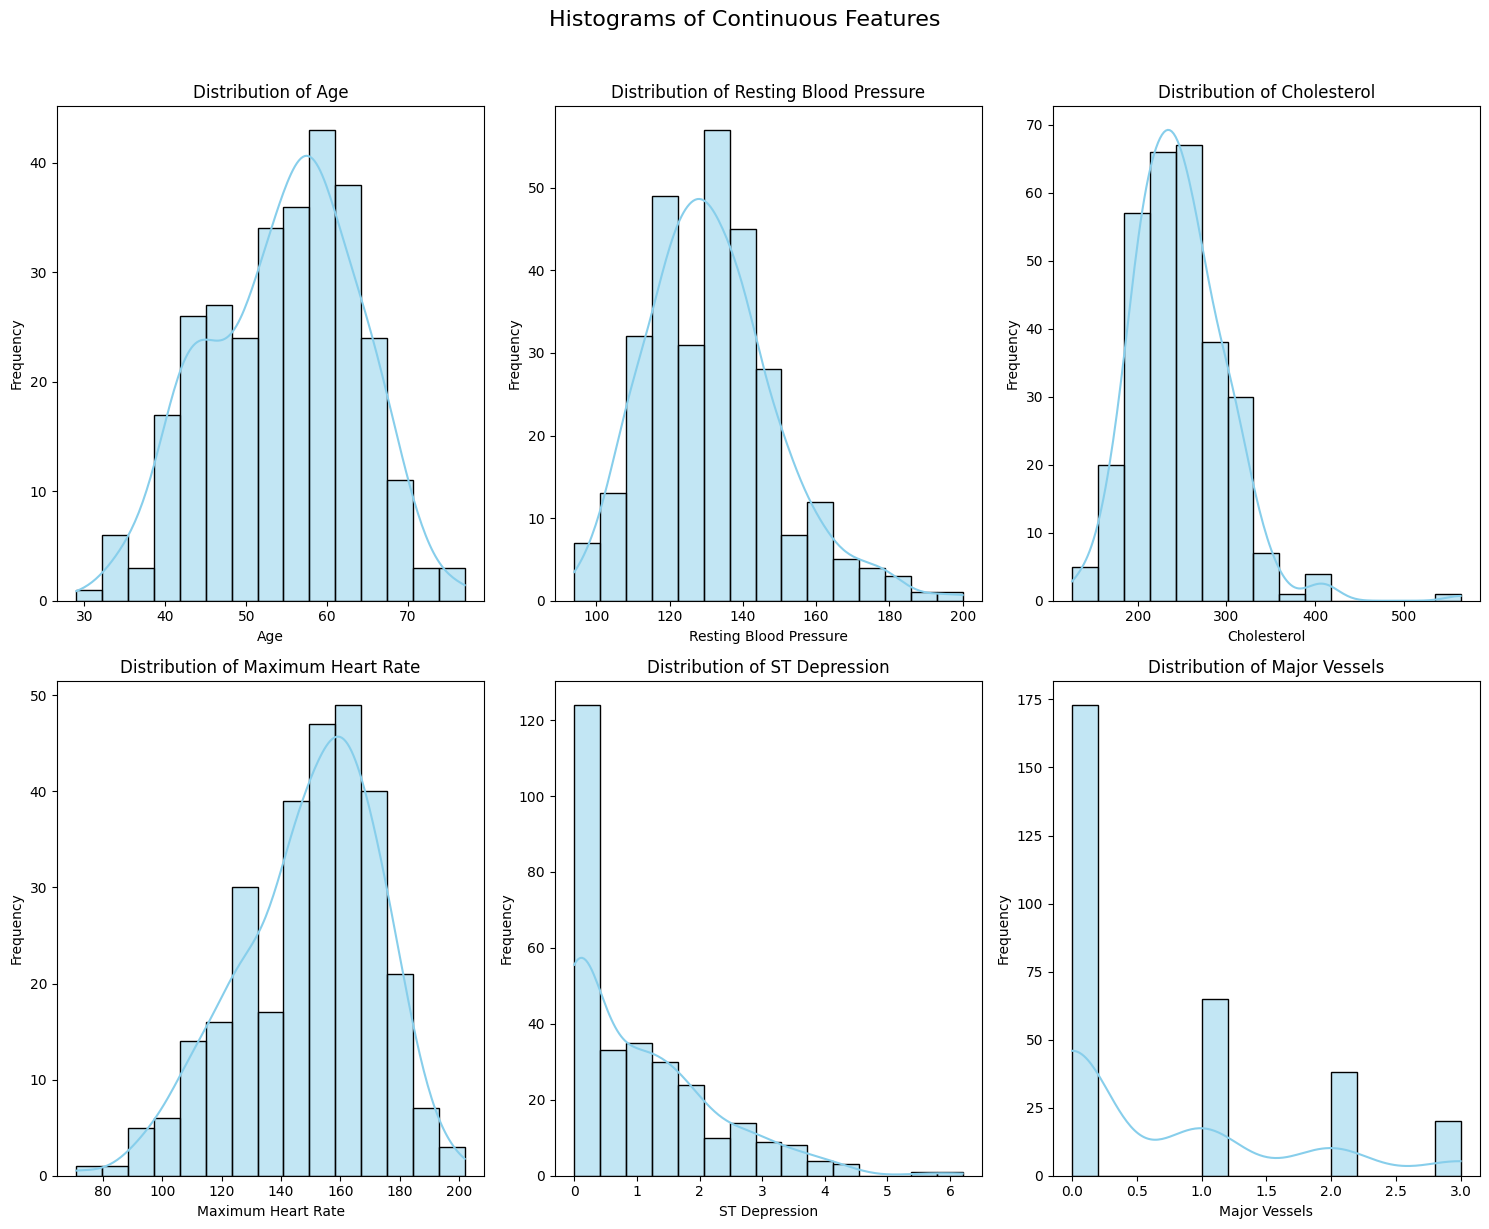

In [78]:
# @title
# Exploring Continuous Features
continuous_features = ['Age', 'Resting Blood Pressure', 'Cholesterol', 'Maximum Heart Rate', 'ST Depression', 'Major Vessels']

# Histograms of Continuous Features
plt.figure(figsize=(15, 12))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(cleaned_data[feature], kde=True, color='skyblue', bins=15)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Add a title to the entire figure
plt.suptitle("Histograms of Continuous Features", fontsize=16, y=1.02)

plt.tight_layout()
plt.show()


# Boxplots of Continuous Features vs Target

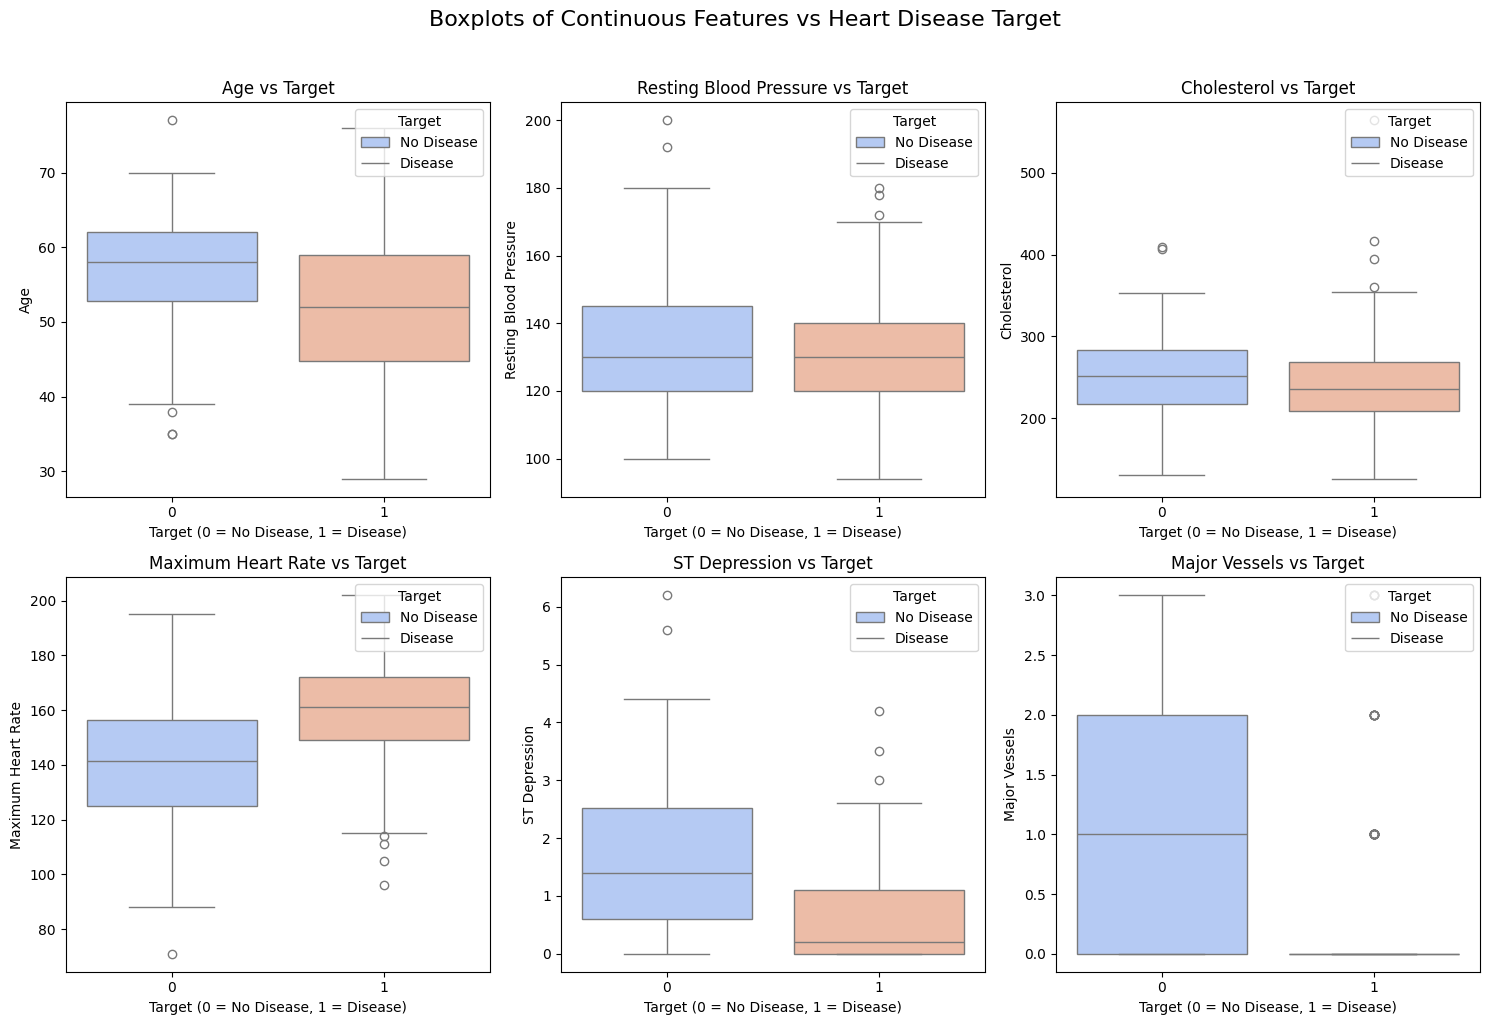

In [77]:
# @title
# Boxplots of Continuous Features vs Target
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='target', y=feature, data=cleaned_data, hue='target', palette='coolwarm', dodge=False)
    plt.title(f'{feature} vs Target')
    plt.xlabel('Target (0 = No Disease, 1 = Disease)')
    plt.ylabel(feature)
    plt.legend(title='Target', labels=['No Disease', 'Disease'], loc='upper right')

# Add a title to the entire figure
plt.suptitle("Boxplots of Continuous Features vs Heart Disease Target", fontsize=16, y=1.02)

plt.tight_layout()
plt.show()


### **Key Observations Based on the Graphs**

1. **Age vs Target**:
   - Patients with heart disease tend to be slightly younger than those without heart disease.
   - The median age for both groups is in the mid-50s, but there are a few younger outliers in the heart disease group.

2. **Resting Blood Pressure vs Target**:
   - Resting blood pressure is similar across both groups, with a slightly higher range for patients without heart disease.
   - Outliers with extremely high blood pressure are observed in the no heart disease group.

3. **Cholesterol vs Target**:
   - Cholesterol levels show significant overlap between both groups, but patients with heart disease tend to have slightly higher cholesterol levels.
   - Several high-cholesterol outliers exist in both groups.

4. **Maximum Heart Rate vs Target**:
   - Patients with heart disease tend to achieve a higher maximum heart rate compared to those without heart disease.
   - The range of heart rates is wider for the heart disease group.

5. **ST Depression vs Target**:
   - Patients without heart disease tend to have higher ST depression values compared to those with heart disease.
   - Outliers with extreme ST depression are observed in the no heart disease group.

6. **Major Vessels vs Target**:
   - Patients without heart disease have a higher number of major vessels with fluoroscopy findings.
   - Most patients with heart disease have fewer major vessels impacted, with several outliers present in the no heart disease group.


 ## Correlation Heatmap

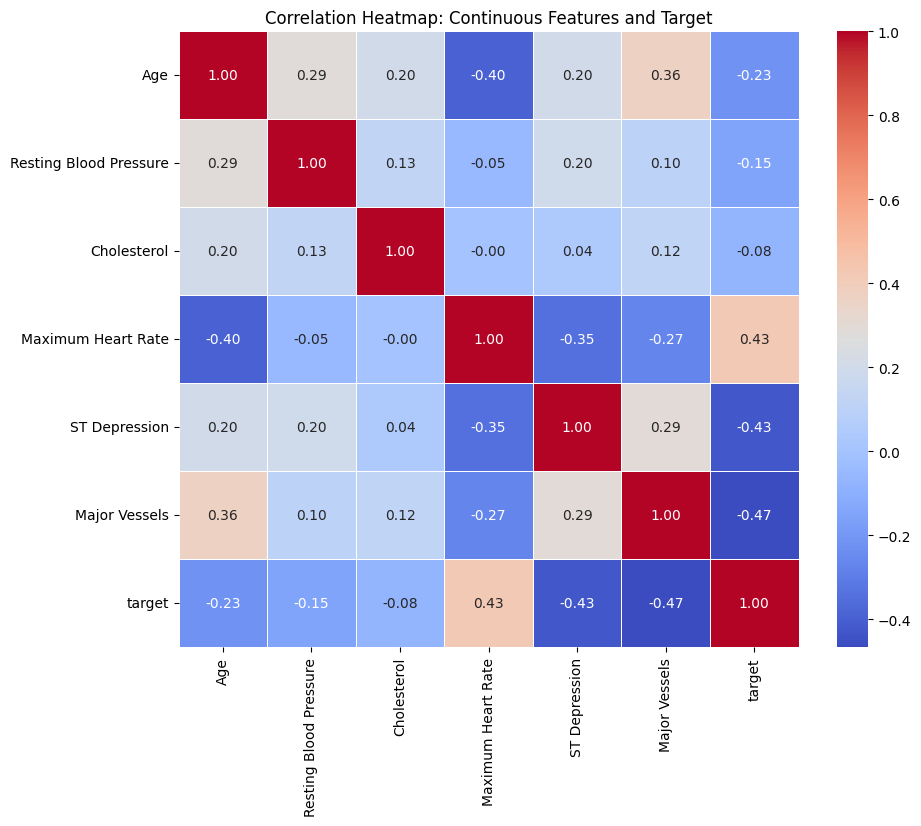

In [22]:
# @title
# Correlation Analysis
correlation_matrix = cleaned_data[continuous_features + ['target']].corr()

# Heatmap of Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Continuous Features and Target')
plt.show()

### **Key Observations from the Correlation Heatmap**

1. **Target (Heart Disease):**
   - **Maximum Heart Rate** shows a positive correlation (**0.43**) with the target, indicating that a higher maximum heart rate is associated with heart disease.
   - **ST Depression** and **Major Vessels** have strong negative correlations with the target (**-0.43** and **-0.47**, respectively), suggesting that lower values in these features are associated with heart disease.

2. **Feature Correlations:**
   - **Age** is moderately positively correlated with **Major Vessels** (**0.36**) and weakly correlated with **Resting Blood Pressure** (**0.29**).
   - **ST Depression** shows a weak positive correlation with **Age** and **Resting Blood Pressure** (~**0.20**).
   - **Maximum Heart Rate** is negatively correlated with **Age** (**-0.40**) and **ST Depression** (**-0.35**), suggesting younger patients and lower ST depression tend to achieve higher heart rates.

3. **Weak or No Correlation:**
   - **Cholesterol** shows very weak or negligible correlations with the target (**-0.08**) and other features, indicating it may not be a strong predictor for heart disease in this dataset.
   - **Resting Blood Pressure** also exhibits weak correlations across the board.


 # EDA Summary

Data size: 303 rows and 14 columns (13 independent + one target variable) > later reduced to 296 after removing faulty data points!

Data has no missing values

Features (columns) data type: Six features are numerical. The rest (seven features) are categorical variables

Target variable is fairly balanced, 54% no-disease to 46% has-disease
Correlations:

Correlation between features is weak at best

From the numerical features num_major_vessels, max_heart_rate_achieved and st_depression are reasonabily fairly correlated with the target variable at -0.47, 0.43 and -0.43 correlation coefficient respectively.

**Takeaway:** features that have higher predictive power could be, chest_pain_type, num_major_vessels, thalassemia, exercise_induced_angina max_heart_rate_achieved and st_depression.

## 2. Modeling & Interpretations

### **Introduction to Predictive Modeling**

To predict the likelihood of heart disease (target variable), I will employ multiple classification models to evaluate their performance and identify the best-performing model. These models will help determine the importance of different features in predicting heart disease and assess their generalization to unseen data.

In this medical context, recall (true positive rate or sensitivity) is of utmost importance. Missing a diagnosis of heart disease (a false negative) can have severe consequences, including delayed treatment and potentially fatal outcomes. While precision is also valuable to minimize false alarms, the overarching goal is to reduce missed diagnoses, making recall the critical metric for model evaluation in this project.

The workflow will include the following steps:
1. **Train-Test Split**: Divide the dataset into an 80% training set and a 20% testing set to train the models and evaluate their performance on unseen data.
2. **Baseline Model**: Establish a benchmark using a dummy classifier to provide a naive standard for comparison.
3. **Feature-Aware Models**: Implement and evaluate the following models:
   - **Logistic Regression**: A simple yet effective model to evaluate feature-based predictions.
   - **K-Nearest Neighbors (KNN)**: A distance-based approach for classifying data.
   - **Decision Tree**: A rule-based model for interpretability and decision-making.
   - **Random Forest**: An ensemble method combining multiple decision trees for better robustness and accuracy.
4. **Evaluation Metrics**: Assess each model's performance using metrics such as Accuracy, Precision, Recall, F1-Score, and Confusion Matrix.
5. **Model Comparison**: Compare the results of all models to identify the most accurate and effective one for predicting heart disease.







**Feature Engineering**

In [23]:
# @title
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

In [24]:
# @title
# Features and Target
X = cleaned_data.drop(columns=['target'])  # Features
y = cleaned_data['target']  # Target

In [82]:
# @title
# Categorical and Numerical Features
categorical_features = [
    'Sex', 'Chest Pain Type', 'Fasting Blood Sugar',
    'Resting ECG Results', 'Exercise-Induced Angina', 'Slope of ST', 'Thalassemia'
]
numerical_features = ['Age', 'Resting Blood Pressure', 'Cholesterol',
                      'Maximum Heart Rate', 'ST Depression', 'Major Vessels']

In [81]:
# @title
# Define preprocessing using make_column_transformer
preprocessor = make_column_transformer(
    (OneHotEncoder(drop='first'), categorical_features),
    remainder=StandardScaler(),
    force_int_remainder_cols=False  # Suppress FutureWarning
)

In [27]:
# @title
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [28]:
# @title
# Apply preprocessing to training and testing data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


print(f"Training Data Shape: {X_train_transformed.shape}")
print(f"Testing Data Shape: {X_test_transformed.shape}")

Training Data Shape: (236, 18)
Testing Data Shape: (60, 18)


# Baseline Model

To establish a baseline for model comparison, I employed a Dummy Classifier that predicts the majority class in the dataset. This serves as a benchmark to evaluate the effectiveness of more advanced models. The Dummy Classifier doesn't use any features or patterns from the data and is intended to show how well a model performs without learning from the data.

In [80]:
# @title
# Initialize Dummy Classifier with "most_frequent" strategy
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)

# Train the Dummy Classifier
dummy_clf.fit(X_train_transformed, y_train)

# Predict using Dummy Classifier
y_pred_dummy = dummy_clf.predict(X_test_transformed)

# Evaluate the Dummy Classifier
print("Classification Report - Dummy Classifier:")
print(classification_report(y_test, y_pred_dummy, zero_division=1))
print(f"Accuracy Score - Dummy Classifier: {accuracy_score(y_test, y_pred_dummy):.4f}")


Classification Report - Dummy Classifier:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        28
           1       0.53      1.00      0.70        32

    accuracy                           0.53        60
   macro avg       0.77      0.50      0.35        60
weighted avg       0.75      0.53      0.37        60

Accuracy Score - Dummy Classifier: 0.5333


### **Baseline Model Interpretation**

**Results from Dummy Classifier:**
- **Accuracy:** 53.33%  
- **Precision (Class 1 - Disease):** 53%  
- **Recall (Class 1 - Disease):** 100%  
- **F1-Score (Class 1 - Disease):** 70%  

**Key Observations:**
1. The dummy classifier achieves an accuracy of 53.33%, equivalent to always predicting the majority class.
2. While the recall for the positive class (patients with heart disease) is perfect at 100%, this is due to the model predicting the positive class for all cases. Consequently, it fails to identify the negative class entirely, leading to a precision of 0% for the negative class.
3. The high recall but poor precision reflects the dummy model's lack of discrimination, highlighting the need for feature-aware models to improve performance.

**Conclusion:**
The dummy classifier provides a low bar for performance, demonstrating the limitations of naive predictions. Feature-based models are expected to improve both precision and recall, offering better balance and insight into the predictors of heart disease. This baseline underscores the importance of incorporating data features into the prediction process.


In [30]:
# @title
# Confusion Matrix for Dummy Classifier
conf_matrix_dummy = confusion_matrix(y_test, y_pred_dummy)
conf_matrix_dummy

array([[ 0, 28],
       [ 0, 32]])

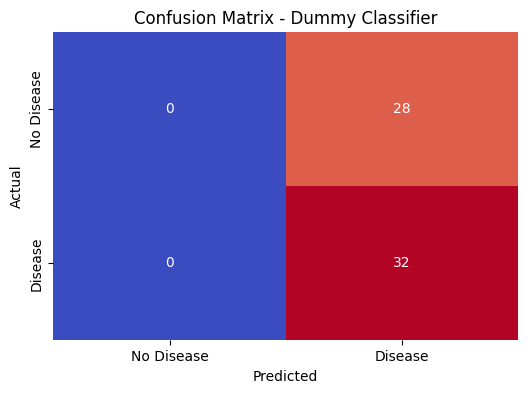

In [31]:
# @title
# Plot the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dummy, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'], cbar=False)
plt.title("Confusion Matrix - Dummy Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The model predicts only the majority class (Disease):

- All 28 instances of "No Disease" (Class 0) are misclassified as "Disease" (Class 1).
- All 32 instances of "Disease" (Class 1) are correctly classified.


#  Logistic Regression


Logistic regression is a widely used classification model that predicts the likelihood of a binary outcome based on input features. Unlike the dummy classifier, logistic regression learns from the data, identifying the relationship between features and the target variable.

In [83]:
# @title
# Define the pipeline with preprocessing and Logistic Regression
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))  # Logistic Regression model
])

logreg_pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'Chest Pain Type',
                                                   'Fasting Blood Sugar',
                                                   'Resting ECG Results',
                                                   'Exercise-Induced Angina',
                                                   'Slope of ST',
                                                   'Thalassemia'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [34]:
# @title
# Train the model
logreg_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg_pipeline.predict(X_test)

# Evaluate Logistic Regression Model
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")

# Classification Report
print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8333

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.84      0.84      0.84        32

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



### **Interpretation of Logistic Regression Results**

**Results from Logistic Regression:**
- **Accuracy:** 83.33%
- **Precision (Class 1 - Disease):** 84%
- **Recall (Class 1 - Disease):** 84%
- **F1-Score (Class 1 - Disease):** 84%

**Interpretation:**
1. **Overall Performance:**
   - Logistic regression significantly outperforms the dummy classifier, improving accuracy from 53.33% to 83.33%.
   - The balance between precision and recall indicates that the model is effective at identifying both positive and negative cases.

2. **Class 1 (Disease) Predictions:**
   - The recall of 84% demonstrates the model’s ability to correctly identify patients with heart disease.
   - The precision of 84% indicates that most of the predicted "Disease" cases are accurate, reducing false positives.

3. **Class 0 (No Disease) Predictions:**
   - The model also achieves an 82% precision and recall for the negative class, correctly identifying most healthy individuals while minimizing false negatives.

**Comparison to Baseline:**
- The logistic regression model shows a substantial improvement in recall and precision over the dummy classifier, reflecting its ability to utilize data features effectively.
- It maintains a high recall, ensuring fewer false negatives, which is critical in a healthcare context to avoid missing patients with heart disease.

**Conclusion:**
Logistic regression sets a strong benchmark for feature-aware models. Its balanced performance across accuracy, precision, recall, and F1-score highlights its reliability and underscores the importance of feature-based learning.



In [35]:
# @title
# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
conf_matrix_logreg

array([[23,  5],
       [ 5, 27]])

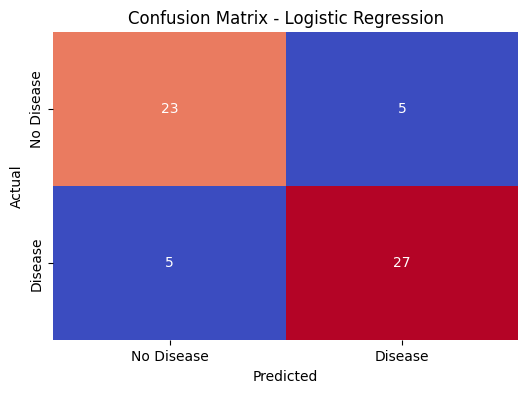

In [36]:
# @title
# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'], cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



### **Interpretation**
1. **True Negatives (23)**:
   - The model correctly identified 23 patients as not having heart disease.

2. **False Positives (5)**:
   - The model incorrectly classified 5 patients as having heart disease when they actually did not.

3. **False Negatives (5)**:
   - The model failed to identify 5 patients who actually had heart disease.

4. **True Positives (27)**:
   - The model correctly identified 27 patients as having heart disease.



### **Insights**

- The model has a good balance between correctly identifying both classes.
- The **False Positives** (5) indicate a potential overprediction of heart disease, which can lead to unnecessary follow-up tests.
- The **False Negatives** (5) highlight cases where the model missed diagnosing heart disease, which can have serious implications in healthcare.


 # K-Nearest Neighbors (KNN) Model

I chose to implement a K-Nearest Neighbors (KNN) model because of its simplicity and ability to capture non-linear relationships between features and the target variable. Unlike logistic regression, which assumes a linear relationship, KNN makes predictions based on the similarity of a data point to its nearest neighbors in the feature space. This approach allows KNN to adapt to the structure of the data, making it suitable for problems where patterns are complex or non-linear.

In [84]:
# @title
# Define the pipeline with preprocessing and KNN
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

knn_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'Chest Pain Type',
                                                   'Fasting Blood Sugar',
                                                   'Resting ECG Results',
                                                   'Exercise-Induced Angina',
                                                   'Slope of ST',
                                                   'Thalassemia'])])),
                ('classifier', KNeighborsClassifier())])

In [39]:
# @title
# Train the pipeline
knn_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_pipeline.predict(X_test)

# Evaluate KNN Model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy:.4f}")

# Classification Report
print("\nClassification Report - KNN:")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.7500

Classification Report - KNN:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74        28
           1       0.77      0.75      0.76        32

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



### **Interpretation of KNN Results**

#### **Performance:**
- **Accuracy**: 75% (vs. 53.33% baseline and 83.33% Logistic Regression)
- **Precision (Class 1 - Disease)**: 77%
- **Recall (Class 1 - Disease)**: 75%
- **F1-Score (Class 1 - Disease)**: 76%

#### **Comparison with Baseline:**
- The dummy classifier predicts only the majority class, achieving **53.33% accuracy** but failing to identify "No Disease" cases.
- KNN improves recall and precision significantly, leveraging features to identify patterns.

#### **Comparison with Logistic Regression:**
- Logistic Regression outperforms KNN with higher accuracy (**83.33%** vs. **75%**) and recall (**84%** vs. **75%**).
- KNN shows a weaker balance between precision and recall, making Logistic Regression a better choice for minimizing false negatives.

#### **Conclusion:**
KNN offers significant improvements over the baseline but underperforms compared to Logistic Regression, which is better suited for heart disease prediction due to its higher recall and overall reliability.



In [40]:
# @title
# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_knn

array([[21,  7],
       [ 8, 24]])

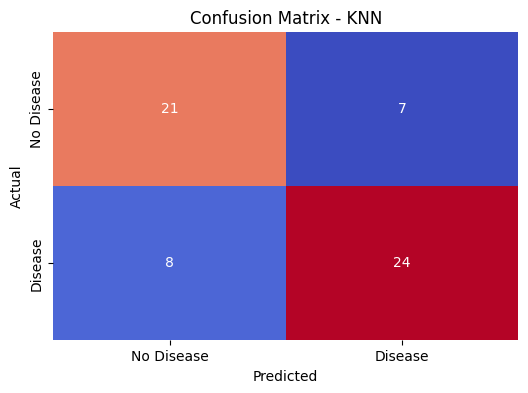

In [41]:
# @title
# Plot Confusion Matrix for KNN
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'], cbar=False)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **Interpretation**

1. **True Positives (TP):** 24 patients with heart disease were correctly classified.
2. **True Negatives (TN):** 21 patients without heart disease were correctly classified.
3. **False Positives (FP):** 7 patients without heart disease were incorrectly classified as having heart disease.
4. **False Negatives (FN):** 8 patients with heart disease were missed by the model.

**Interpretation:**
- **Strength:** The model performs better in identifying true positives (recall of 75%) than the baseline, indicating that it effectively identifies most patients with heart disease.
- **Weakness:** False positives (7 cases) indicate potential overprediction of heart disease, leading to unnecessary follow-ups or tests.

Compared to logistic regression, KNN has higher false negatives (8 vs. 5), making it less reliable for identifying all heart disease cases, which is critical in this healthcare context.



### **Next Steps**
To improve KNN's performance, I will conduct hyperparameter tuning to identify the optimal number of neighbors and the most suitable distance metric. This step is crucial to ensure the model can better differentiate between the classes and potentially match or exceed the performance of logistic regression.


## Hyperparameter Tuning for KNN

To improve the KNN model's performance, we'll tune the hyperparameter
k, which determines the number of neighbors used for classification. A smaller
k can capture local patterns but may overfit, while a larger k smoothens predictions and reduces variance.

In [42]:
# @title
param_grid = {
    'n_neighbors': range(1, 20),
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search_knn.fit(X_train_transformed, y_train)

# Best parameters and best score
best_k = grid_search_knn.best_params_['n_neighbors']
best_metric = grid_search_knn.best_params_['metric']
best_score = grid_search_knn.best_score_

print(f"Best n_neighbors: {best_k}")
print(f"Best metric: {best_metric}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

y_pred_knn = grid_search_knn.best_estimator_.predict(X_test_transformed)

print("Tuned KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))


Fitting 5 folds for each of 38 candidates, totalling 190 fits
Best n_neighbors: 7
Best metric: manhattan
Best cross-validation accuracy: 0.8391
Tuned KNN Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.79      0.84      0.82        32

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60




#### **Key Observations:**
- **Improved Recall for Class 1 (Disease):** Recall for detecting heart disease increased to 84%, reducing false negatives compared to the untuned KNN model.
- **Balanced Precision and Recall:** Precision for predicting heart disease is 79%, ensuring a balance between reducing false positives and correctly identifying patients with heart disease.
- **Overall Performance:** The tuned KNN achieved an accuracy of 80%, which is a slight improvement over the untuned model (75%).

#### **Comparison with Baseline:**
- The dummy classifier predicts only the majority class, achieving **53.33% accuracy** but failing to identify "No Disease" cases.
- Tuned KNN significantly improves recall, precision, and overall accuracy, leveraging features to make balanced predictions.


#### **Comparison with Logistic Regression:**
- Both models achieve the same **recall (84%)**, meaning they are equally effective at identifying patients with heart disease.

- Logistic Regression achieves higher accuracy (**83.33%** vs. **80%**) and precision (**84%** vs. **79%**), making it better at reducing false positives.

- Tuned KNN offers a slight advantage in non-linearity but remains less reliable overall.

#### **Conclusion:**
While Tuned KNN performs well, matching Logistic Regression in recall and improving over the baseline, Logistic Regression remains the preferred model due to its higher accuracy and precision, especially in a context where minimizing false positives is also important.



In [43]:
# @title
# Confusion Matrix
conf_matrix_best_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_best_knn

array([[21,  7],
       [ 5, 27]])

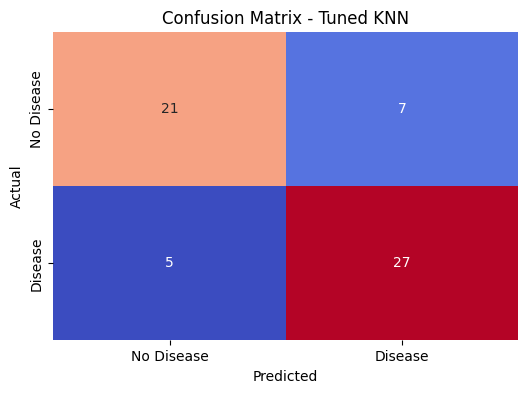

In [44]:
# @title
# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best_knn, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'], cbar=False)
plt.title("Confusion Matrix - Tuned KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **Interpretation**

1. **True Negatives (21)**:
   - The model correctly identified **21 patients as not having heart disease**.

2. **False Positives (7)**:
   - The model incorrectly classified **7 patients as having heart disease** when they actually did not.

3. **False Negatives (5)**:
   - The model failed to identify **5 patients who actually had heart disease**.

4. **True Positives (27)**:
   - The model correctly identified **27 patients as having heart disease**.



### **Insights**
- **Improvements Over Default KNN**:
  - False negatives reduced from **8 to 5**, improving recall for "Disease."
  - Precision and recall for "No Disease" improved slightly, balancing the model's performance.

- **Comparison with Logistic Regression**:
  - Logistic Regression has the same number of False Negatives (5) but fewer False Positives (5 vs. 7), leading to better precision for "Disease."
  - Logistic Regression still edges out in overall accuracy (**83.33% vs. 80.00%**).


### **Conclusion**
The tuned KNN model demonstrates notable improvement over the default version, particularly in recall for detecting heart disease.

Compare with Logistic Regression: While both models have equivalent recall for detecting heart disease, Logistic Regression is slightly better at minimizing false positives and overall accuracy. Given our focus on recall, either model could be suitable, but Logistic Regression provides a slightly more balanced approach.


# Decision Tree Model

I chose to build a Decision Tree Classifier because, like K-Nearest Neighbors, decision trees can capture non-linear relationships in the data. They are highly interpretable models, making it easy to understand the decision-making process through visualization. Decision trees split the dataset based on feature thresholds, allowing the model to learn complex patterns in the data.

In the context of heart disease prediction, decision trees provide valuable insights into which features (e.g., chest pain type, age, cholesterol levels) are most influential in determining whether a patient has heart disease. By analyzing the tree structure, we can understand the paths leading to specific classifications, which adds transparency to the predictions and aids in decision-making.

I will evaluate the model's performance using accuracy, precision, recall, and F1-score. To ensure the model generalizes well, I will also tune hyperparameters to optimize its performance.

## 1. Baseline Decision Tree


In [88]:
# @title
# Initialize the Decision Tree model with default parameters
dtree = DecisionTreeClassifier(random_state=42)


dtree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', dtree)
])

dtree_pipeline



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'Chest Pain Type',
                                                   'Fasting Blood Sugar',
                                                   'Resting ECG Results',
                                                   'Exercise-Induced Angina',
                                                   'Slope of ST',
                                                   'Thalassemia'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [89]:
# @title
# Train the model
dtree_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_dtree = dtree_pipeline.predict(X_test)

# Evaluate the Decision Tree model
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dtree))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.68      0.70        28
           1       0.74      0.78      0.76        32

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.73      0.73      0.73        60



### **Interpretation of Default Decision Tree Results**

#### **Performance Metrics:**
- **Accuracy**: 73% (vs. 53.33% baseline)
- **Precision (Class 1 - Disease)**: 74%
- **Recall (Class 1 - Disease)**: 78%
- **F1-Score (Class 1 - Disease)**: 76%

#### **Key Insights:**
1. **Recall**:
   - The Decision Tree identifies **78% of patients with heart disease**, a significant improvement over the baseline model, which failed to predict any "No Disease" cases.
   - However, recall is lower compared to Logistic Regression (84%) and Tuned KNN (84%).

2. **Precision**:
   - Precision of **74%** indicates that most predicted "Disease" cases are accurate, though Logistic Regression (84%) and Tuned KNN (79%) perform better.

3. **Accuracy**:
   - An overall accuracy of **73%** is notably higher than the baseline but lower than Logistic Regression (83%) and Tuned KNN (80%).

#### **Comparison with Other Models**:
- **Baseline Model**: The Decision Tree significantly outperforms the baseline, showing the value of feature-based learning.
- **Logistic Regression**: Outperforms the Decision Tree in accuracy, precision, recall, and F1-Score, making it the most reliable model.
- **Tuned KNN**: Performs better in recall (84% vs. 78%) and F1-Score (82% vs. 76%), with a more balanced trade-off between precision and recall.

#### **Conclusion**:
The Decision Tree model provides valuable interpretability and identifies key predictors of heart disease. However, it underperforms compared to Logistic Regression and Tuned KNN in all major metrics, making it less suitable as the primary predictive model for this dataset. It is still a better option than the baseline for exploratory insights.






In [47]:
# @title
# Confusion Matrix
conf_matrix_dtree = confusion_matrix(y_test, y_pred_dtree)
conf_matrix_dtree


array([[19,  9],
       [ 7, 25]])

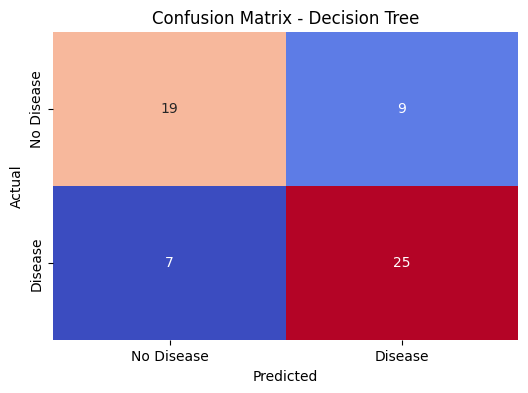

In [49]:
# @title
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dtree, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'], cbar=False)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Explanation of Confusion Matrices

- True Positives: 25 (Misses 7 cases, more false negatives than other models, critical in healthcare).

- False Positives: 9 (Overpredicts heart disease, leading to unnecessary tests).

- Comparison: Less effective than other models in balancing recall and precision but significantly better than the baseline.

 ## Feature Importance

Feature importance highlights the most influential features used by the Decision Tree. This provides insights into what the model considers most predictive.

In [91]:
# @title
# Extract and display feature importance
feature_importances = pd.DataFrame({
    'Feature': dtree_pipeline.named_steps['preprocessor'].get_feature_names_out(),
    'Importance': dtree_pipeline.named_steps['classifier'].feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
                                              Feature  Importance
17                           remainder__Major Vessels    0.262583
14                             remainder__Cholesterol    0.163220
11       onehotencoder__Thalassemia_Reversible Defect    0.143124
16                           remainder__ST Depression    0.095967
12                                     remainder__Age    0.085061
3       onehotencoder__Chest Pain Type_Typical Angina    0.084335
15                      remainder__Maximum Heart Rate    0.066997
0                             onehotencoder__Sex_Male    0.032010
7          onehotencoder__Exercise-Induced Angina_Yes    0.017925
8                     onehotencoder__Slope of ST_Flat    0.015281
6   onehotencoder__Resting ECG Results_ST-T Abnorm...    0.014226
13                  remainder__Resting Blood Pressure    0.010166
1      onehotencoder__Chest Pain Type_Atypical Angina    0.009105
10                  onehotencoder__Thalassemia_Normal 

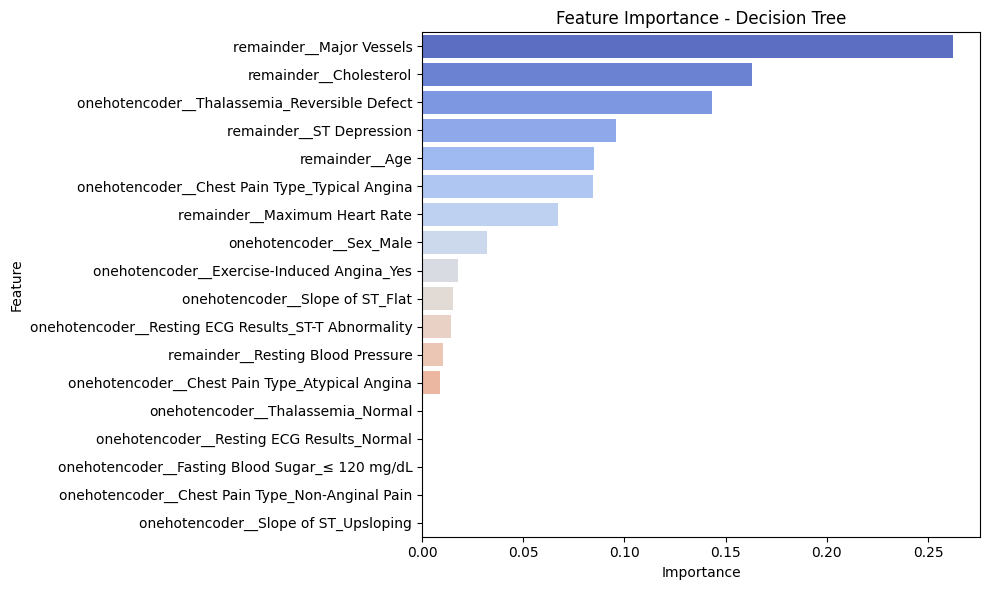

In [92]:
# @title
# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', hue='Feature', palette='coolwarm', dodge=False, legend=False)
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### **Feature Importance Insights**

The default decision tree identified the following key predictors for heart disease:

1. **Major Vessels (0.26)**:
   - Blocked vessels were the strongest predictor. This is likely because reduced blood flow to the heart directly indicates coronary artery disease.

2. **Cholesterol (0.16)**:
   - High cholesterol is critical as it can lead to plaque buildup in arteries, increasing the risk of blockages and heart disease.

3. **Thalassemia - Reversible Defect (0.14)**:
   - Genetic conditions like thalassemia affect oxygen transport in the blood, which could exacerbate cardiovascular issues.

4. **ST Depression (0.10)**:
   - ST-segment depression reflects stress on the heart during exercise, signaling potential ischemia or poor cardiac function.




While the baseline decision tree provided valuable insights into feature importance and achieved reasonable performance, its results suggest potential overfitting, particularly with a high number of splits and a reliance on less impactful features. To improve generalization and ensure robust predictions on unseen data, hyperparameter tuning is necessary.

## 2. Tuned Decision Tree

Why Tune?

The baseline Decision Tree might overfit the training data, limiting its generalizability. Hyperparameter tuning aims to address this by optimizing key parameters:

max_depth: Restricts the tree's depth to prevent overfitting.

min_samples_split: Ensures a minimum number of samples to split a node, reducing overly complex splits.

min_samples_leaf: Sets the minimum samples required in a leaf node, encouraging simpler, more robust trees.

In [53]:
# @title
# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search_dtree = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_dtree.fit(X_train_transformed, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [54]:
# @title
# Best parameters and cross-validation score
best_params = grid_search_dtree.best_params_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {grid_search_dtree.best_score_:.4f}")

# Train the tuned model
best_dtree = grid_search_dtree.best_estimator_

# Predict with the tuned model
y_pred_best_dtree = best_dtree.predict(X_test_transformed)

# Evaluate the tuned model
print("Tuned Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_best_dtree))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_best_dtree):.4f}")

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.7842
Tuned Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        28
           1       0.75      0.84      0.79        32

    accuracy                           0.77        60
   macro avg       0.77      0.76      0.76        60
weighted avg       0.77      0.77      0.76        60

Accuracy Score: 0.7667



### **Tuned Decision Tree Insights**

#### **Comparison with Other Models**:

1. **Dummy Classifier**:
   - Accuracy: Improved significantly from **53%** to **77%**.
   - Recall for Class 1 ("Disease"): Maintains high recall (84%) while overcoming the Dummy Classifier's inability to predict Class 0 ("No Disease").

2. **Baseline Decision Tree**:
   - Recall for Class 1: Increased from **78%** to **84%,** prioritizing the identification of true positives.
   - Accuracy: Improved from **73%** to **77%,** reflecting better generalization and reduced overfitting.

3. **Logistic Regression**:
   - Logistic Regression outperforms the Tuned Decision Tree in accuracy (**83% vs. 77%**) and precision for Class 1 ("Disease") (**84% vs. 75%**).
   - Both models achieve the same recall for Class 1 (84%), but Logistic Regression minimizes false positives better, providing a more balanced performance.

4. **Tuned KNN**:
   - Tuned KNN achieves slightly higher accuracy (**80% vs. 77%**) and precision for Class 1 (**79% vs. 75%**), making it a better alternative for balancing false positives and negatives.



#### **Key Insights**:
- The tuning process, focused on limiting the depth of the Decision Tree, successfully improved recall for detecting heart disease cases and reduced overfitting compared to the baseline Decision Tree.
- While the Tuned Decision Tree performs significantly better than the Dummy Classifier, it is less effective than Logistic Regression and Tuned KNN, particularly in precision and overall accuracy.



#### **Conclusion**:
The **Tuned Decision Tree** is a reasonable model for scenarios prioritizing **recall**, as it effectively minimizes false negatives (critical in healthcare). However, for a better balance between recall and precision, **Logistic Regression** and **Tuned KNN** are more reliable choices. Further exploration with ensemble methods like Random Forest could improve the Decision Tree's performance while maintaining its interpretability.





In [55]:
# @title
conf_matrix_best_dtree = confusion_matrix(y_test, y_pred_best_dtree)
conf_matrix_best_dtree

array([[19,  9],
       [ 5, 27]])

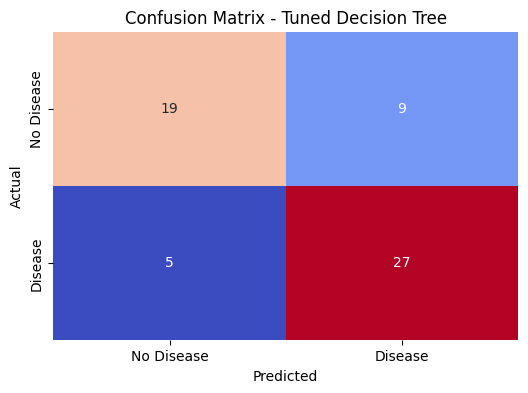

In [56]:
# @title
# Confusion Matrix for Tuned Decision Tree
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best_dtree, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'], cbar=False)
plt.title("Confusion Matrix - Tuned Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **Confusion Matrix Analysis**


### **Insights**:
1. **True Positives (27)**:
   - The model correctly identifies 27 patients with heart disease, reflecting its strength in minimizing missed diagnoses.

2. **True Negatives (19)**:
   - It correctly classifies 19 patients as not having heart disease.

3. **False Positives (9)**:
   - The model misclassifies 9 healthy individuals as having heart disease. This could lead to unnecessary stress and further testing.

4. **False Negatives (5)**:
   - Five cases of heart disease are missed, which is critical to address as it could delay necessary treatment.



### **Comparison with Other Models**:
- **Logistic Regression**:
  - same false negatives (**5 vs. 5**)
  - Lower false positives (**5 vs. 9**), indicating better precision.

- **Default Decision Tree**:
  - The tuned tree shows better recall (**84% vs. 78%**) and slightly fewer false negatives (**5 vs. 7**).



### **Conclusion**:
The tuned decision tree strikes a balance between identifying true positives and limiting false negatives. However, the higher false positive rate suggests the model tends to over-predict heart disease, which can be mitigated by further tuning or using ensemble methods like Random Forest.

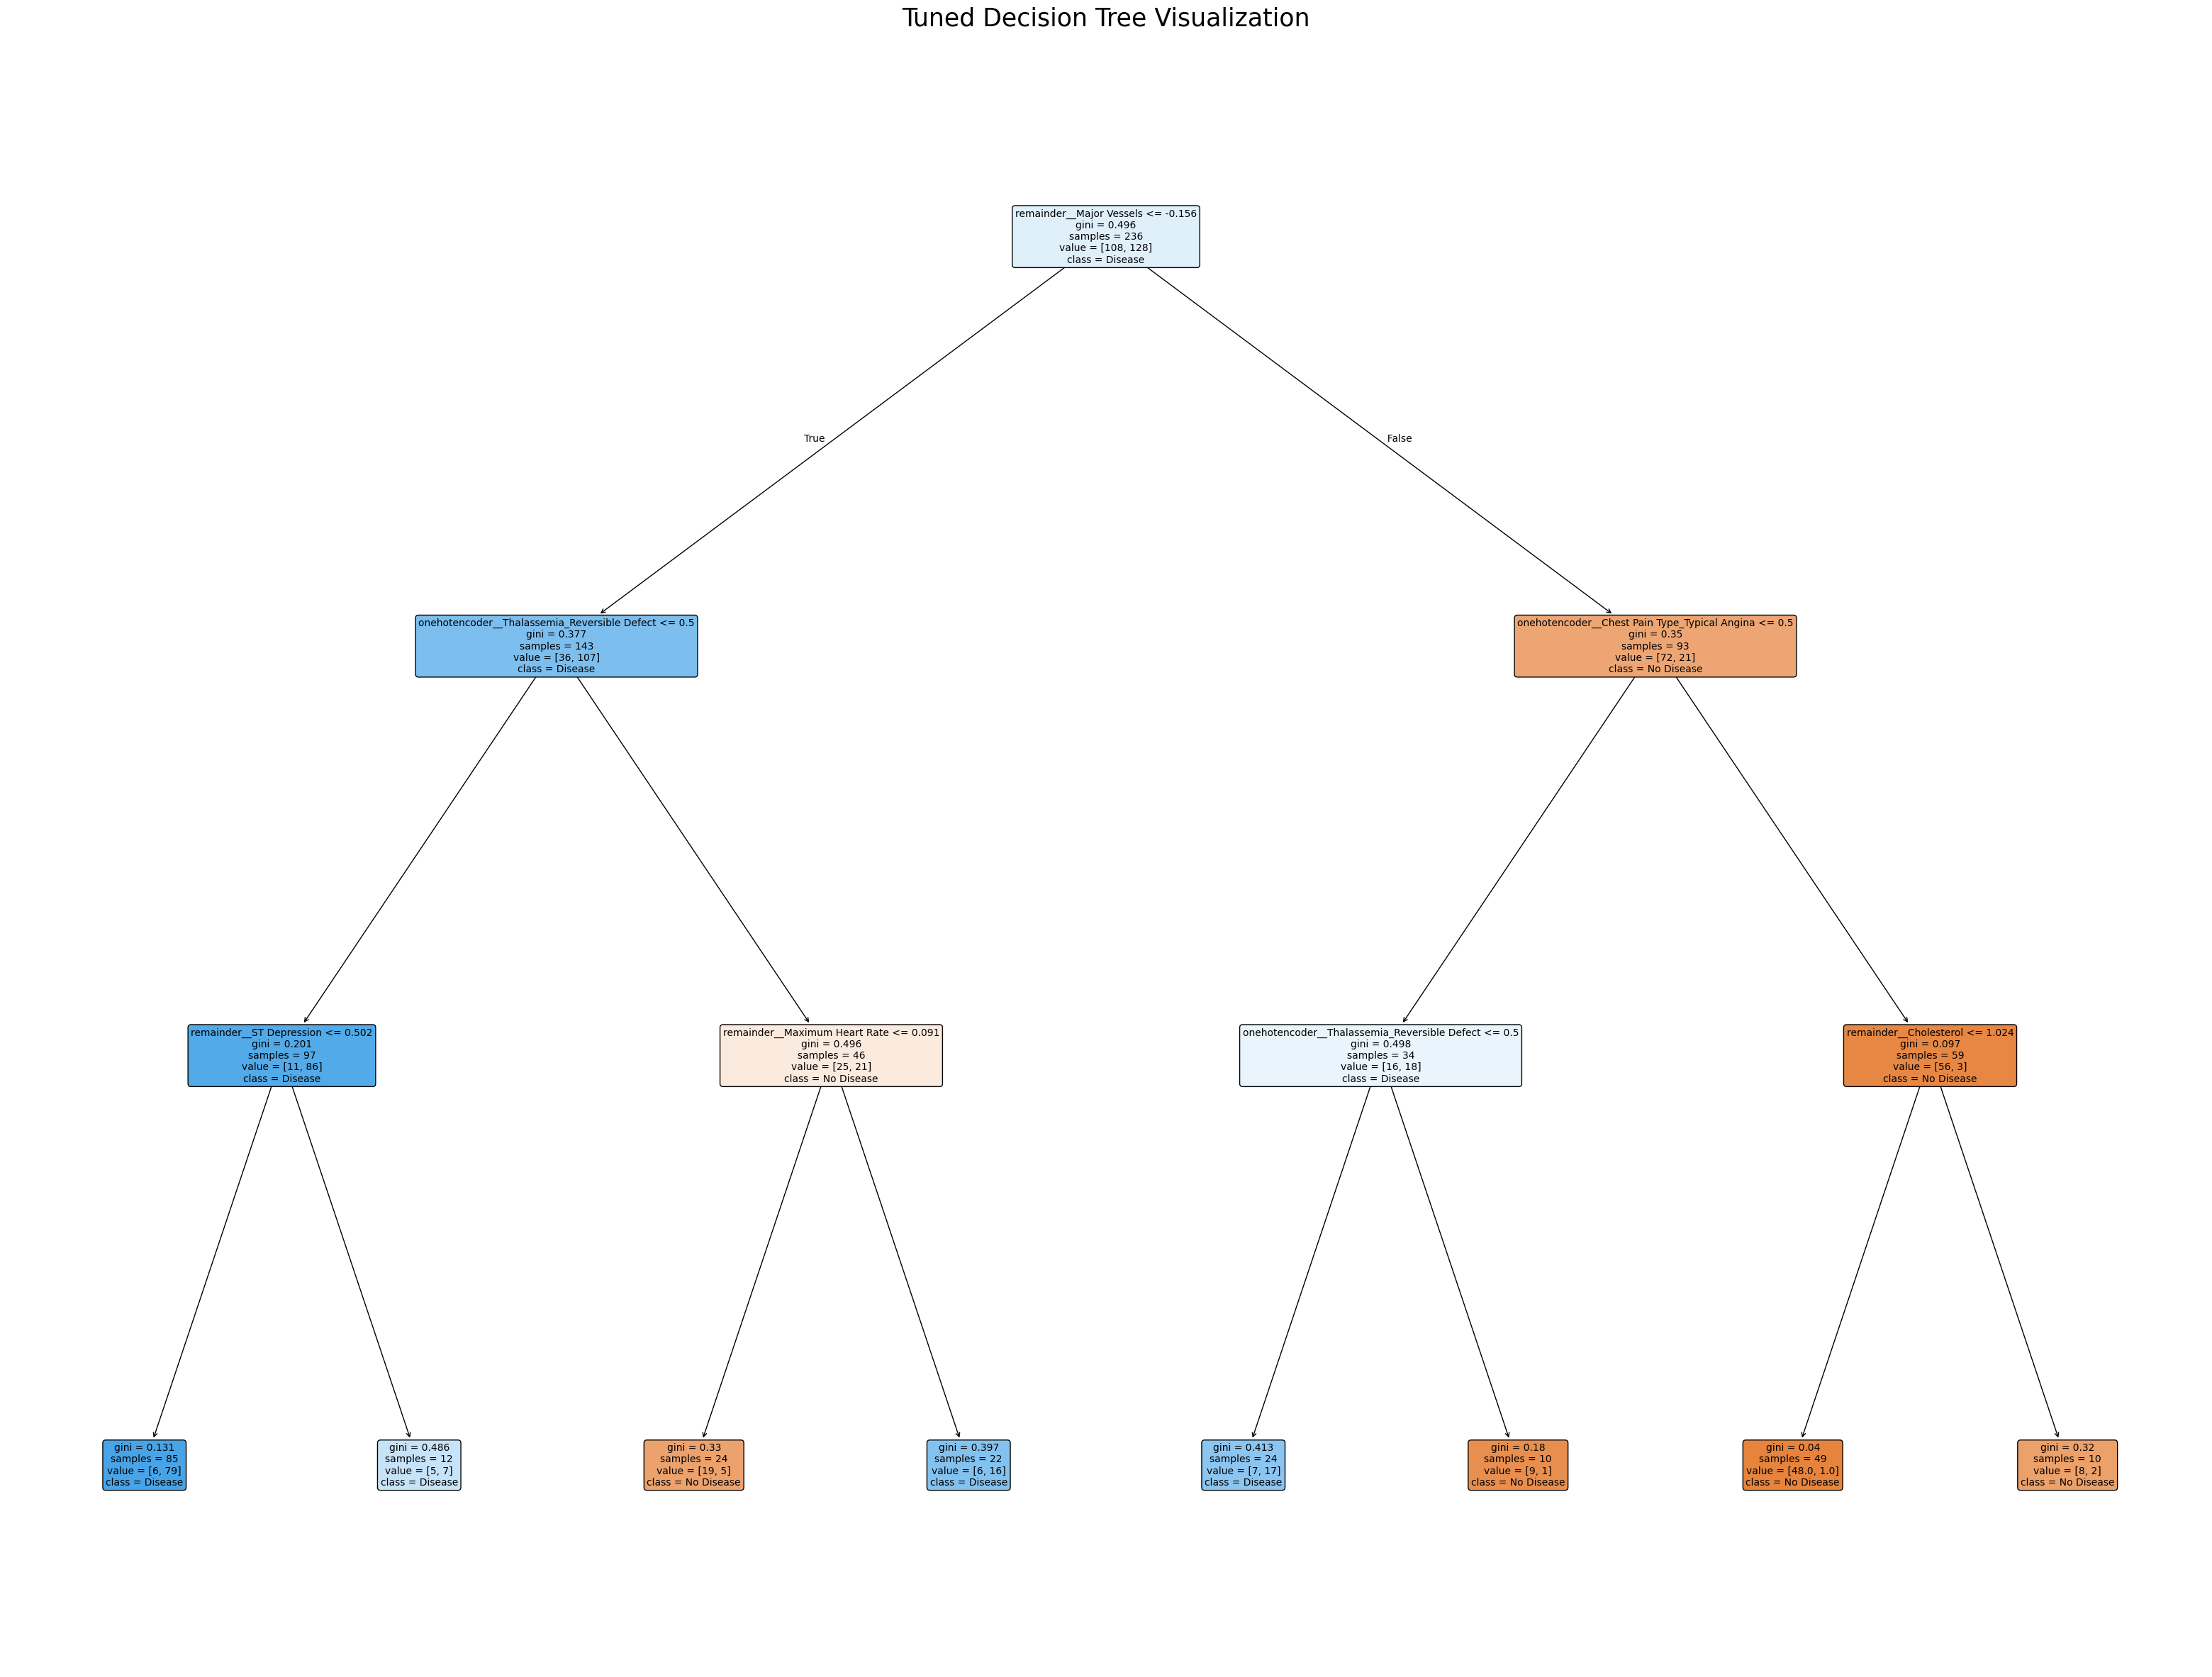

In [76]:
# @title
# Visualize the Tuned Decision Tree
plt.figure(figsize=(40, 30))

# Plot the tree
plot_tree(
    best_dtree,
    feature_names=preprocessor.get_feature_names_out(),
    class_names=['No Disease', 'Disease'],
    filled=True,
    fontsize=10,
    rounded=True
)

plt.title("Tuned Decision Tree Visualization", fontsize=25)

plt.show()

### **Random Forest Model**

Building on the insights and performance of the Decision Tree model, I chose to extend this approach using a Random Forest classifier, a robust ensemble method. While the Decision Tree provided valuable interpretability and moderate performance, it showed signs of overfitting and limited generalization. Random Forest addresses these issues by combining multiple decision trees, averaging their predictions to reduce overfitting, enhance generalization, and improve predictive accuracy. This makes it particularly well-suited for identifying patterns in complex datasets like heart disease prediction, where capturing interactions between features is critical.

In [58]:
# @title
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_transformed, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_transformed)

# Evaluate Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.84      0.83        32

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.82      0.82      0.82        60

Random Forest Accuracy: 0.8167


### **Random Forest Interpretation**


#### **Comparison with Other Models**:
1. **Baseline Dummy Classifier**:
   - Recall for Class 1: Random Forest matches the Dummy Classifier’s recall (84%) but provides meaningful predictions for Class 0 ("No Disease"), which the Dummy Classifier fails to address.
   - Accuracy improved significantly from **53%** (Dummy) to **81.67%** (Random Forest).

2. **Tuned Decision Tree**:
   - Recall for Class 1: Both Random Forest and the Tuned Decision Tree achieve **84% recall**, minimizing false negatives effectively.
   - Accuracy: Random Forest performs better (81.67% vs. 77%), indicating superior overall performance.
   - Precision for Class 1: Random Forest edges out the Tuned Decision Tree (82% vs. 75%), resulting in fewer false positives.

3. **Tuned KNN**:
   - Recall for Class 1: Both Random Forest and Tuned KNN achieve **84% recall**, ensuring minimal missed diagnoses.
   - Accuracy: Random Forest is slightly more accurate (81.67% vs. 80%), demonstrating better generalization to unseen data.

4. **Logistic Regression**:
   - Recall for Class 1: Both models achieve **84% recall**, minimizing false negatives for heart disease cases.
   - Precision: Logistic Regression slightly outperforms Random Forest (84% vs. 82%), resulting in fewer false positives.
   - Accuracy: Logistic Regression is marginally better (83% vs. 81.67%).



#### **Insights**:
- **Focus on Recall**: Random Forest is as effective as the Tuned Decision Tree, Logistic Regression, and Tuned KNN in recall (84%), prioritizing the reduction of false negatives for heart disease cases.
- **Balanced Performance**: Random Forest outperforms the Tuned Decision Tree and KNN in accuracy and precision, while remaining competitive with Logistic Regression.
- **Robustness**: Its ensemble nature ensures better handling of feature interactions and reduces overfitting compared to the single Decision Tree.



#### **Conclusion**:
Random Forest is a robust model for heart disease prediction, excelling in recall and overall accuracy. It is a strong choice over the Tuned Decision Tree and KNN for its higher accuracy and precision. However, Logistic Regression remains a viable alternative, particularly in contexts where simplicity, interpretability, and precision are prioritized.







In [59]:
# @title
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_rf

array([[22,  6],
       [ 5, 27]])

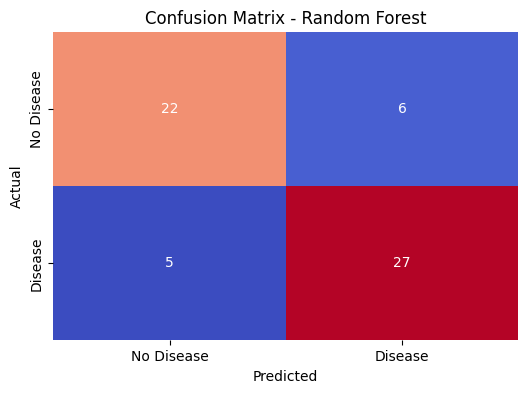

In [60]:
# @title
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'], cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Confusion Matrix Interpretation for Random Forest

#### **Insights**:
- **True Positives (27)**: The model correctly identifies 27 patients with heart disease, achieving a high recall of 84% for Class 1 (Disease).
- **True Negatives (22)**: It accurately classifies 22 patients as not having heart disease, showing reliable performance for Class 0 (No Disease).
- **False Positives (6)**: Six healthy patients are misclassified as having heart disease, reflecting a slight overprediction that could lead to unnecessary follow-ups.
- **False Negatives (5)**: Five patients with heart disease are missed, a critical area for improvement given the healthcare context.

#### **Comparison**:
- **Tuned Decision Tree**: Random Forest matches the recall of the Tuned Decision Tree (84%) but achieves better overall accuracy and fewer false positives (6 vs. 9).
- **Tuned KNN**: While both models have the same recall (84%) for heart disease, Random Forest’s higher accuracy (81.67% vs. 80%) and fewer false negatives make it more robust.
- **Logistic Regression**: Random Forest performs equally well in recall (84%) but has slightly higher false positives (6 vs. 5), resulting in marginally lower precision.



#### **Conclusion**:
Random Forest excels in recall, matching the best models for minimizing false negatives, while offering improved accuracy and robustness over the Tuned Decision Tree and KNN. Although Logistic Regression maintains a slight edge in precision, Random Forest's ensemble nature makes it a strong contender for heart disease prediction, especially when recall is the primary focus.



## Feature Importance

In [61]:
# @title
# Feature Importance
rf_feature_importances = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(rf_feature_importances)


Feature Importances:
                                              Feature  Importance
17                           remainder__Major Vessels    0.139808
15                      remainder__Maximum Heart Rate    0.121317
16                           remainder__ST Depression    0.115858
11       onehotencoder__Thalassemia_Reversible Defect    0.113270
3       onehotencoder__Chest Pain Type_Typical Angina    0.087296
12                                     remainder__Age    0.082926
14                             remainder__Cholesterol    0.070908
13                  remainder__Resting Blood Pressure    0.066660
7          onehotencoder__Exercise-Induced Angina_Yes    0.058165
0                             onehotencoder__Sex_Male    0.035961
8                     onehotencoder__Slope of ST_Flat    0.027966
2     onehotencoder__Chest Pain Type_Non-Anginal Pain    0.018068
6   onehotencoder__Resting ECG Results_ST-T Abnorm...    0.015216
5           onehotencoder__Resting ECG Results_Normal 

### Explanation of the Top 5 Features from Random Forest Base Model


#### **Top Features**:

1. **Major Vessels (13.98%)**:
   - **Why it Matters**: The number of major vessels visible via fluoroscopy indicates the degree of arterial blockages. Blocked or narrowed vessels restrict blood flow to the heart, leading to ischemia and a higher likelihood of heart disease. This feature is critical because it directly measures the structural integrity of the circulatory system.

2. **Maximum Heart Rate (12.13%)**:
   - **Why it Matters**: During physical activity, the heart’s ability to reach a higher rate reflects its capacity to handle increased oxygen demands. Patients with heart disease often have compromised cardiovascular function, resulting in lower achievable heart rates. A lower maximum heart rate during exertion signals potential heart conditions.

3. **ST Depression (11.59%)**:
   - **Why it Matters**: ST depression during an ECG stress test indicates reduced oxygen supply to the heart (ischemia) under exertion. It highlights how well the heart copes with physical stress, with higher ST depression values strongly associated with coronary artery disease.

4. **Thalassemia – Reversible Defect (11.33%)**:
   - **Why it Matters**: Thalassemia, a blood disorder affecting hemoglobin, impacts oxygen transport. Patients with certain thalassemia patterns may experience chronic oxygen deprivation, which places additional stress on the heart and increases the risk of complications that contribute to heart disease.

5. **Chest Pain Type – Typical Angina (8.73%)**:
   - **Why it Matters**: Typical angina is characterized by chest pain caused by reduced blood flow to the heart. As one of the classic symptoms of heart disease, its presence provides direct evidence of underlying cardiac issues such as blocked arteries or oxygen deprivation.



#### **Other Influential Features**:

6. **Age (8.29%)**:
   - **Why it Matters**: Heart disease risk increases with age due to the cumulative effects of arterial plaque buildup, reduced elasticity of blood vessels, and general wear on the cardiovascular system over time.

7. **Cholesterol (7.09%)**:
   - **Why it Matters**: High cholesterol levels contribute to atherosclerosis, where plaque builds up in arteries, narrowing them and increasing the risk of blockages. This is a well-documented risk factor for heart disease.

8. **Resting Blood Pressure (6.67%)**:
   - **Why it Matters**: Elevated resting blood pressure indicates chronic strain on the heart and arteries, increasing the risk of both heart disease and related complications, such as heart failure or stroke.

9. **Exercise-Induced Angina (5.82%)**:
   - **Why it Matters**: Chest pain triggered by physical activity reveals that the heart struggles to meet increased oxygen demands during exertion. This strongly indicates coronary artery blockages or reduced blood supply to the heart muscle.



### **Key Takeaways**:
- The **top features** emphasize structural (e.g., major vessels, ST depression) and functional (e.g., maximum heart rate, angina) indicators of heart disease, closely aligning with clinical knowledge.
- The Random Forest model effectively identifies these features as key predictors, reinforcing its utility in modeling complex datasets with intertwined physiological and structural risk factors.



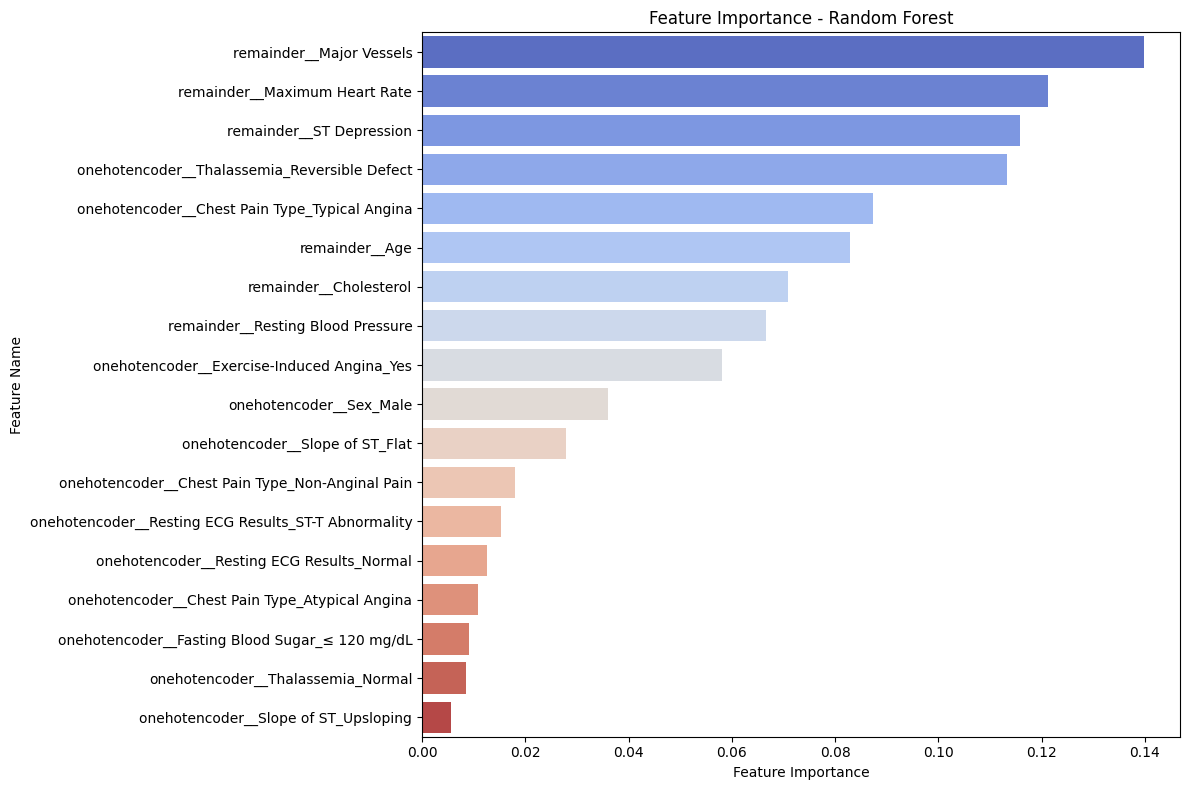

In [93]:
# @title
# Plot Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(data=rf_feature_importances, x='Importance', y='Feature', hue='Feature', dodge=False, palette='coolwarm', legend=False)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

Building on the strong performance of the default Random Forest model, hyperparameter tuning is explored to optimize its parameters and evaluate whether further improvements in predictive accuracy and generalization can be achieved.

## Hyperparameter Tuning for Random Forest

In [69]:
# @title
# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [70]:
# @title
# Fit the grid search to the training data
grid_search_rf.fit(X_train_transformed, y_train)



/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [71]:
# @title
# Best parameters and cross-validation accuracy
best_params_rf = grid_search_rf.best_params_
best_cv_score_rf = grid_search_rf.best_score_
print(f"Best Parameters: {best_params_rf}")
print(f"Best Cross-Validation Accuracy: {best_cv_score_rf:.4f}")



Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.8644


In [72]:
# @title
# Train the tuned Random Forest model
best_rf_model = grid_search_rf.best_estimator_

# Predict with the tuned model
y_pred_best_rf = best_rf_model.predict(X_test_transformed)



In [73]:
# @title
# Evaluate the tuned model
print("Tuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_best_rf):.4f}")

Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.77      0.84      0.81        32

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60

Accuracy Score: 0.7833


### **Tuned Random Forest vs. Default Random Forest**

#### **Performance Comparison**:
- **Class 0 (No Disease)**:
  - The tuned model achieved a recall of 71%, lower than the default model's 79%, indicating more healthy individuals were misclassified as having heart disease.
  - Precision for Class 0 dropped slightly from 81% in the default model to 80%, showing a slight increase in false positives.

- **Class 1 (Disease)**:
  - Both models maintained a strong recall of 84% for identifying patients with heart disease, effectively minimizing false negatives.
  - However, precision for Class 1 decreased in the tuned model (77% vs. 82%), indicating slightly more incorrect predictions for heart disease cases.

- **Overall**:
  - The default model outperformed the tuned model in overall accuracy (81.67% vs. 78.33%) and macro-average F1-score (82% vs. 78%).

#### **Insights**:
- The tuned model prioritized recall for heart disease cases, maintaining its ability to minimize false negatives (Class 1 recall of 84%).
- However, this came at the cost of slightly reduced precision and recall for Class 0, resulting in more false positives for healthy individuals and a drop in overall accuracy.

#### **Conclusion**:
The default Random Forest model demonstrated better overall balance and accuracy. While the tuned model succeeded in maintaining recall for detecting heart disease, its marginal improvements do not outweigh the trade-offs in precision and accuracy for healthy individuals. The default configuration remains the stronger choice for this dataset.

In [74]:
# @title
# Confusion Matrix
conf_matrix_rf_tuned = confusion_matrix(y_test,y_pred_best_rf)
conf_matrix_rf_tuned

array([[20,  8],
       [ 5, 27]])

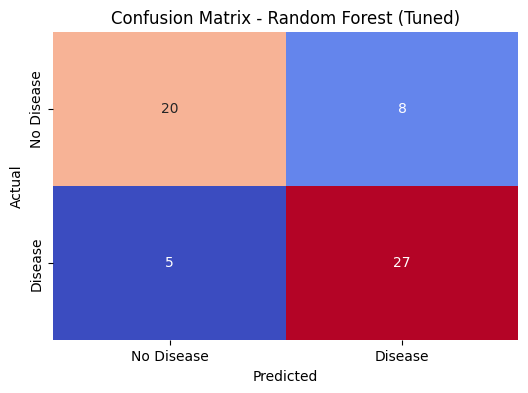

In [133]:
# @title
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf_tuned, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'], cbar=False)
plt.title("Confusion Matrix - Random Forest (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Comparison to Default Random Forest:
- False Positives (8 vs. 6): The tuned model predicts more false positives, reducing precision.
- False Negatives (5 vs. 5): Both models perform equally in missing disease cases.

The Default Random Forest maintains a better balance between precision and recall, especially for non-disease cases, making it a more reliable model overall.

# Final Model Selection

In [75]:
# @title
# Model performance data
model_comparison = {
    "Model": [
        "Baseline Dummy Model",
        "Logistic Regression",
        "Tuned KNN",
        "Tuned Decision Tree",
        "Default Random Forest",
        "Tuned Random Forest"
    ],
    "Recall": [1.00, 0.84, 0.84, 0.84, 0.84, 0.84],
    "Precision": [0.53, 0.84, 0.79, 0.75, 0.82, 0.77],
    "F1-Score": [0.70, 0.84, 0.82, 0.79, 0.83, 0.81],
    "Accuracy": [0.53, 0.83, 0.80, 0.77, 0.82, 0.78]
}

# Create a DataFrame
df_comparison = pd.DataFrame(model_comparison)
df_comparison

,Model,Recall,Precision,F1-Score,Accuracy
0,Baseline Dummy Model,1.00,0.53,0.70,0.53
1,Logistic Regression,0.84,0.84,0.84,0.83
2,Tuned KNN,0.84,0.79,0.82,0.80
3,Tuned Decision Tree,0.84,0.75,0.79,0.77
4,Default Random Forest,0.84,0.82,0.83,0.82
5,Tuned Random Forest,0.84,0.77,0.81,0.78


## Final Model Selection

Based on the performance metrics and contextual considerations, **Logistic Regression** and the **Default Random Forest** emerge as the most suitable models for heart disease prediction.

#### **Primary Recommendation: Logistic Regression**
- **Why Choose It?**
  - **Balanced Metrics**: Achieves the highest accuracy (83%) alongside balanced precision and recall scores (84% each).
  - **Interpretability**: Its simplicity allows healthcare professionals to understand and trust the decision-making process, which is vital in medical applications.
  - **Generalization**: Performs consistently well across all metrics, reducing both false positives and false negatives.

- **Limitations**:
  - May struggle with non-linear relationships in the data, which ensemble methods like Random Forest can handle more effectively.

#### **Alternative Recommendation: Default Random Forest**
- **Why Choose It?**
  - **Recall Focus**: Matches Logistic Regression in recall (84%), ensuring minimal missed diagnoses (false negatives).
  - **Robustness**: Its ensemble nature handles non-linear feature interactions and reduces overfitting, making it a robust choice for complex datasets.
  - **Feature Insights**: Identifies clinically relevant predictors, such as "Major Vessels" and "ST Depression," aligning with medical expertise.

- **Limitations**:
  - Slightly lower precision (82%) compared to Logistic Regression, leading to more false positives (6 vs. 5).
  - Marginally lower accuracy (81.67%), which could impact reliability in certain scenarios.

#### **Trade-offs and Contextual Implications**
1. **Recall Priority**: In medical contexts where the goal is to minimize missed diagnoses, either model is suitable, as both achieve high recall (84%).
2. **Precision Consideration**: If reducing false positives is equally important, Logistic Regression offers better precision (84% vs. 82%), reducing unnecessary follow-ups.
3. **Interpretability vs. Complexity**: Logistic Regression is preferred for its simplicity, while Random Forest provides additional robustness and insights into feature importance.

#### **Conclusion**
- **Primary Selection**: Logistic Regression, for its balance, interpretability, and superior overall performance.
- **Alternative**: Default Random Forest, for contexts requiring robust handling of non-linear relationships or additional insights into feature importance.



## Summary
The goal of this project was to predict heart disease using clinical data, leveraging machine learning models to identify patterns and generate actionable insights for healthcare applications.

Key outcomes:
1. **Logistic Regression emerged as the top-performing model**, achieving an accuracy of 83.33%, and balanced precision and recall scores of 84% each. Its simplicity and interpretability make it particularly suited for contexts where clear decision-making is essential.
2. Other models like the **Default Random Forest** and **Tuned KNN** delivered competitive recall scores (84%), which is critical for minimizing missed diagnoses. However, they fell slightly behind Logistic Regression in terms of precision and overall balance.
3. **Feature importance analysis** highlighted key predictors such as the number of major vessels, ST depression, and maximum heart rate, aligning with clinical knowledge about heart disease risk factors.

Despite these successes, there remain opportunities for improvement, particularly in terms of dataset size and feature diversity. The analysis underscores the potential of data-driven approaches to enhance early detection and management of heart disease.


## Next Steps and Limitations

#### **Next Steps**
To enhance the predictive capabilities and applicability of the models, i proposed the following directions:

1. **Expand the Dataset**:
   - The current dataset size (296 samples) limits generalizability. Expanding it by incorporating similar datasets or larger repositories could improve model robustness and minimize overfitting risks.

2. **Incorporate Additional Features**:
   - Include lifestyle factors (e.g., diet, physical activity, smoking habits) and family history to create a more comprehensive dataset reflecting real-world risk factors.
   - Explore temporal data or patient history for dynamic predictions (e.g., changes in cholesterol or blood pressure over time).

3. **Experiment with Advanced Models**:
   - Evaluate ensemble and boosting algorithms such as **XGBoost**, **CatBoost**, or **LightGBM** to leverage their ability to handle complex interactions and non-linear patterns effectively.
   - Investigate deep learning approaches like neural networks for potentially higher predictive accuracy.

4. **Improve Model Interpretability**:
   - Utilize methods such as **SHAP** or **LIME** to ensure predictions align with medical understanding and support clinical decision-making.

5. **Feature Engineering and Interaction Analysis**:
   - Investigate combinations of key features (e.g., ST Depression with Exercise-Induced Angina) to identify synergistic effects on predictions.
   - Apply domain-specific knowledge to engineer new features that could capture nuanced aspects of heart disease risk.

### **Limitations**
1. **Dataset Size**:
   - The small sample size restricts the generalizability of results and increases the likelihood of overfitting in more complex models (e.g., Decision Tree and Random Forest).

2. **Feature Scope**:
   - While clinically relevant, the dataset lacks lifestyle and socio-economic factors critical to understanding heart disease risk comprehensively.

3. **Assumption of Balanced Data**:
   - Though the dataset is relatively balanced, potential class imbalances in larger datasets may require the use of sampling techniques (e.g., SMOTE) or adjusted metrics to ensure fairness.

4. **Model Simplifications**:
   - Logistic Regression assumes linearity in relationships, which may oversimplify the complexity of real-world heart disease risk.

5. **Contextual Relevance**:
   - The dataset's predictors are primarily clinical, which may limit applicability in contexts requiring more diverse or holistic data (e.g., global health settings).

#### **Conclusion**:
This analysis underscores the potential of leveraging machine learning for early detection of heart disease, aiding clinicians in making more informed decisions. As healthcare continues to integrate data-driven tools, refining these models with richer datasets and advanced algorithms will unlock even greater potential for saving lives and improving quality of care.

